In [1]:
import numpy as np
import h5py


In [2]:
# open C_cells.mat file

def printkeys(name):
    with h5py.File(name, 'r') as f:
        print(f.keys())
        for key in f.keys():
            print(f[key])
            

In [169]:
printkeys('Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/intercalation_time.mat')

with h5py.File('Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/intercalation_time.mat', 'r') as f:
    print(f["/#refs#"]["c"][:].shape)

<KeysViewHDF5 ['#refs#', 'intercalation_time']>
<HDF5 group "/#refs#" (5 members)>
<HDF5 dataset "intercalation_time": shape (1, 4), type "|O">
(1, 487)


In [144]:
printkeys("Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/cell_behaviors.mat")

with h5py.File("Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/cell_behaviors.mat", 'r') as f:
    behaviors = [np.array(f['cell_behaviors'][b]) for b in f['cell_behaviors'].keys()]

<KeysViewHDF5 ['#refs#', 'cell_behaviors']>
<HDF5 group "/#refs#" (1 members)>
<HDF5 group "/cell_behaviors" (8 members)>


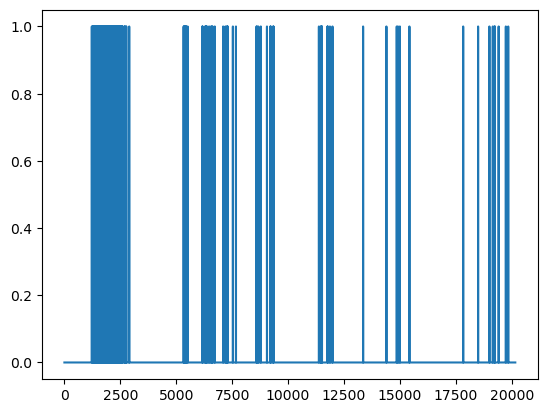

In [161]:
plt.plot(behaviors[3][0])

In [89]:
name = "Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1620 (intercalations)/cell_behaviors.mat"

with h5py.File(name, 'r') as f:
    print(f.keys())
    print(f['cell_behaviors']["do_nothing"])

<KeysViewHDF5 ['#refs#', 'cell_behaviors']>
<HDF5 dataset "do_nothing": shape (1, 20155), type "|u1">


In [302]:
name = "Data analysis\Data analysis\Deconstructing Gastrulation - Data\Img_1830 (divisions)\Mesh\V_cells.mat"

with h5py.File(name, 'r') as f:
    print(f.keys())
    print(f["V_cells"])
    cc = np.array(f["V_cells"])

<KeysViewHDF5 ['V_cells']>
<HDF5 dataset "V_cells": shape (3, 1568154), type "<f8">


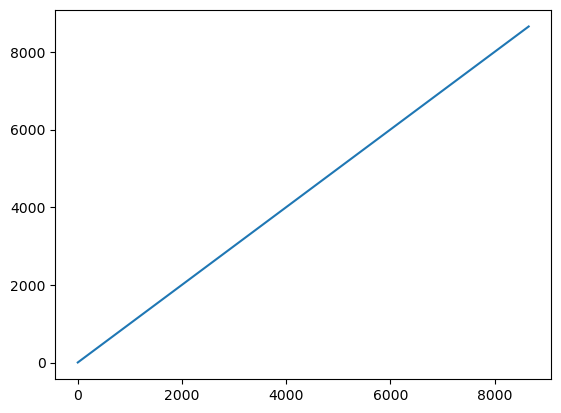

In [328]:
plt.plot(c_cells[1][c_cells[0] == 55])

In [3]:
name = "Data analysis/Data analysis/Deconstructing Gastrulation - Data/Img_1830 (divisions)/Mesh/V_coords.mat"

with h5py.File(name, 'r') as f:
    print(f.keys())
    print(f["V_coords"])
    c_cells = np.array(f["V_coords"])

<KeysViewHDF5 ['V_coords']>
<HDF5 dataset "V_coords": shape (5, 521839), type "<f8">


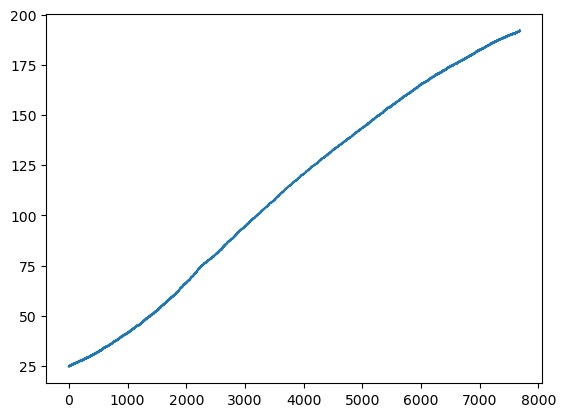

In [235]:
plt.plot(c_cells[4, c_cells[0] == 30])

In [280]:
(c_cells[0,:] == 4).sum()

10666

0
0
0
0
1
10662
2
10667
3
10673
4
10666
5
10632
6
10588
7
10552
8
10500
9
10414
10
10303
11
10124
12
9980
13
9792
14
9640
15
9500
16
9342
17
9243
18
9079
19
8923
20
8755
21
8592
22
8399
23
8259
24
8138
25
8042
26
7900
27
7840
28
7771
29
7733
30
7684
31
7647
32
7634
33
7560
34
7523
35
7517
36
7528
37
7531
38
7542
39
7536
40
7559
41
7596
42
7657
43
7730
44
7785
45
7880
46
7964
47
8043
48
8156
49
8226
50
8313
51
8396
52
8474
53
8526
54
8610
55
8654
56
8700
57
8740
58
8778
59
8806


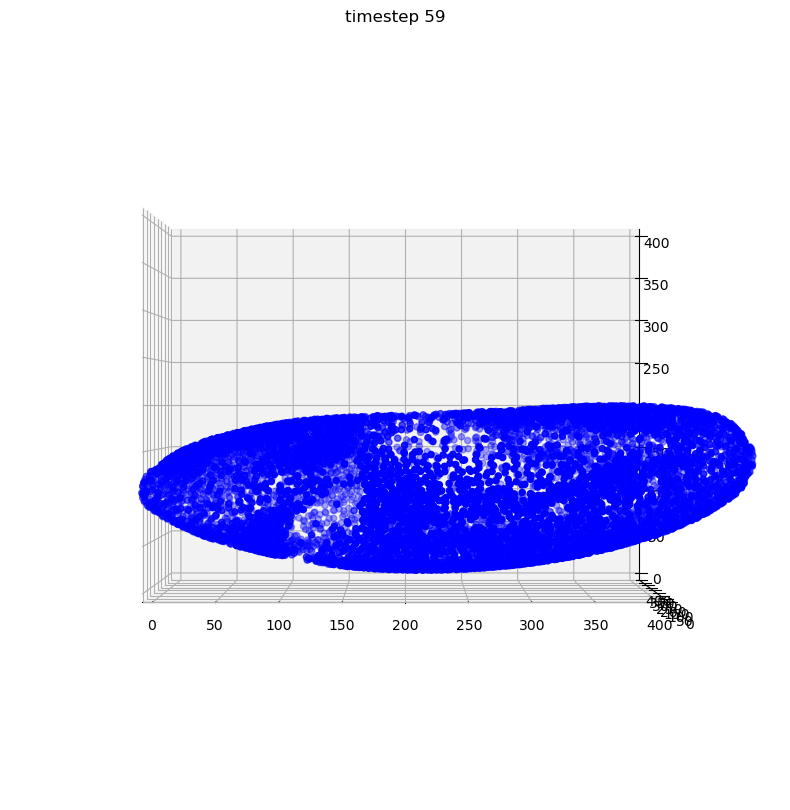

In [28]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# make 3d animation of the data

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d', )



def func(i):
    print(i)
    ax.clear()
    indx = c_cells[0,:] == i

    # make sure there is only N_fist_idx cells in any frame

    print(indx.sum())

    # half = c_cells[4,indx] > 100
    ax.scatter(500-c_cells[3,indx],c_cells[4,indx], c_cells[2,indx], c='blue', marker='o')
    ax.set_title(f"timestep {i}")

    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_zlim(0, 400)

    ax.view_init(0, 270)


ani = FuncAnimation(fig, func, frames=range(0, 60), interval=100)

ani.save('animation.mp4', writer='ffmpeg')

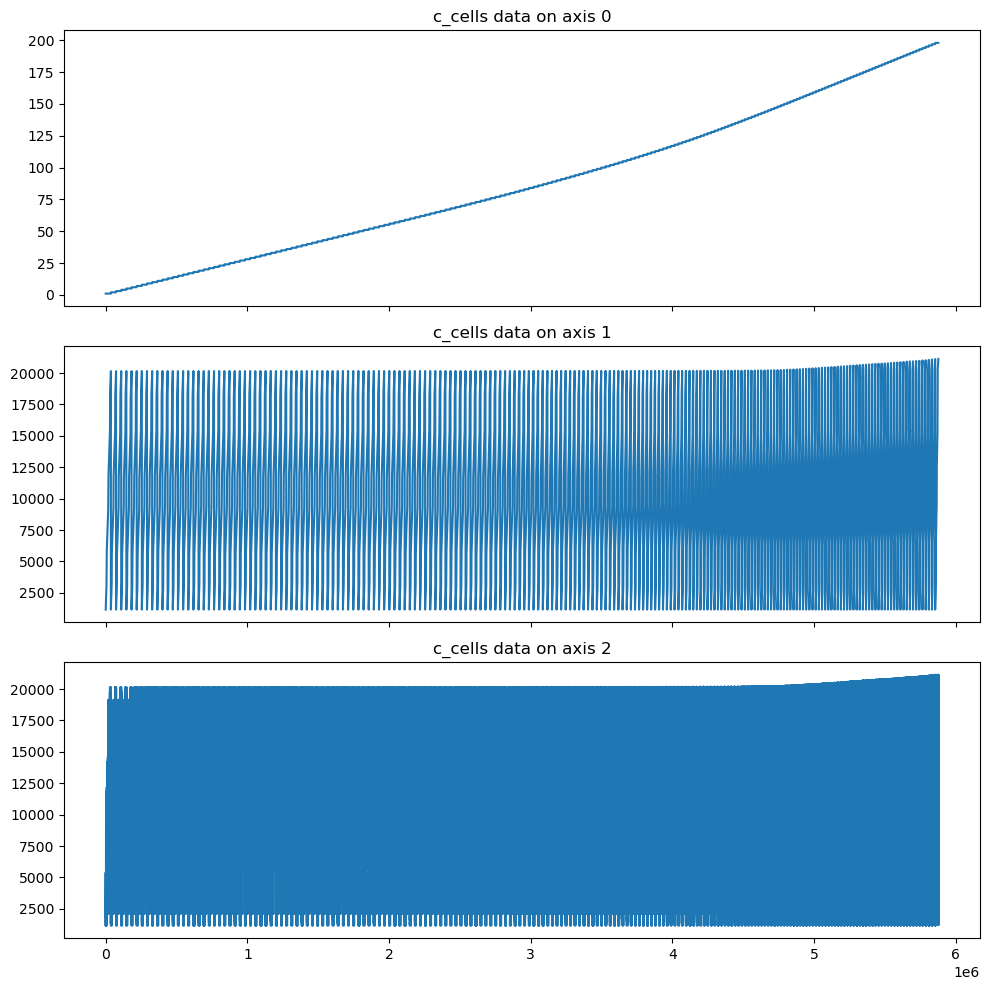

In [180]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 1, figsize=(10, 10), sharex=True, sharey=False)
for i in range(3):
    axs[i].plot(c_cells[i])
    axs[i].set_title(f"c_cells data on axis {i}")
fig.tight_layout()
plt.show()

In [4]:
x,y,z = 500-c_cells[3,:],c_cells[4,:], c_cells[2,:]



In [5]:
import pandas as pd

RuntimeError: module compiled against API version 0xf but this version of numpy is 0xe

In [9]:
# make new empty dataframe

from scipy.spatial import distance
df = pd.DataFrame()

# add the x,y,z columns to the dataframe
for frame in range(1,60):
    indx = c_cells[0,:] == frame

    xx, yy, zz = x[indx]/2.5, y[indx], z[indx]

    # remove any cells that are too close to each other

    points = np.array([x[indx], y[indx], z[indx]]).T
    dsts = distance.pdist(points)
    dsts = distance.squareform(dsts)
    np.fill_diagonal(dsts, np.inf)
    close = np.any(dsts < 2, axis=0)

    xx = xx[~close]
    yy = yy[~close]
    zz = zz[~close]

    # print(np.min(xx), np.max(xx))
    # print(np.min(yy), np.max(yy))
    # print(np.min(zz), np.max(zz))


    newrow = pd.DataFrame({"x": xx, "y": yy, "z": zz, "frame": frame})

    print(newrow.shape)
    df = pd.concat([df, newrow], ignore_index=True)

df.head()

(7113, 4)
(7086, 4)
(7012, 4)
(6967, 4)
(6809, 4)
(6726, 4)
(6619, 4)
(6500, 4)
(6376, 4)
(6324, 4)
(6224, 4)
(6053, 4)
(5997, 4)
(5892, 4)
(5777, 4)
(5602, 4)
(5476, 4)
(5339, 4)
(5262, 4)
(5144, 4)
(4847, 4)
(4738, 4)
(4589, 4)
(4444, 4)
(4338, 4)
(4297, 4)
(4198, 4)
(4138, 4)
(4116, 4)
(4085, 4)
(4125, 4)
(4105, 4)
(4173, 4)
(4241, 4)
(4311, 4)
(4321, 4)
(4301, 4)
(4372, 4)
(4320, 4)
(4457, 4)
(4503, 4)
(4626, 4)
(4660, 4)
(4629, 4)
(4585, 4)
(4675, 4)
(4645, 4)
(4763, 4)
(4718, 4)
(4801, 4)
(4849, 4)
(4794, 4)
(4817, 4)
(4774, 4)
(4764, 4)
(4714, 4)
(4821, 4)
(4750, 4)
(4696, 4)


,x,y,z,frame
0,99.325641,24.750181,103.450500,1
1,99.011359,24.807440,109.474197,1
2,98.487561,24.629951,106.069504,1
3,97.020923,24.682329,106.593300,1
4,108.545062,25.142401,106.331398,1


In [10]:
(dsts<1.).sum()

1974

In [20]:
import trackpy as tp

# track the particles
pred = tp.predict.NearestVelocityPredict()
t = pred.link_df(df, 2., memory=3, )
# trshow(tr)

Frame 59: 4696 trajectories present.


In [21]:
t["particle"].unique()


array([    0,     1,     2, ..., 43670, 43669, 43671], dtype=int64)

In [58]:
# save the data
t.to_csv("tracked_data.csv")

In [33]:
import pandas as pd

t = pd.read_csv("tracked_data.csv")

In [35]:
# get movements
t["dx"] = t.groupby("particle")["x"].diff()
t["dy"] = t.groupby("particle")["y"].diff()
t["dz"] = t.groupby("particle")["z"].diff()


t.to_csv("tracked_data.csv")

0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59


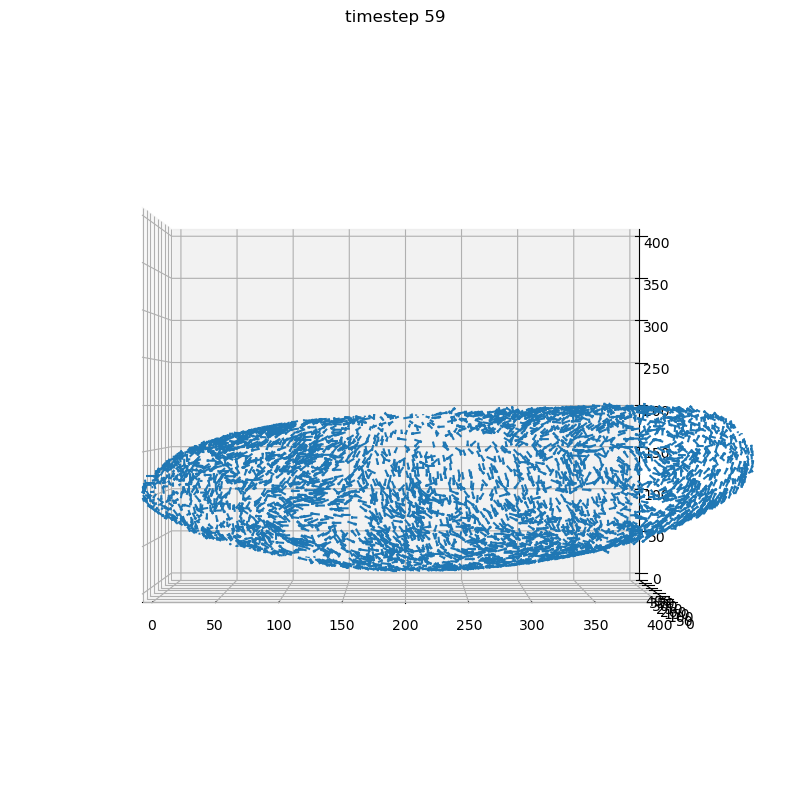

In [31]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# make 3d animation of the movements

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d', )

def func(i):
    print(i)
    ax.clear()
    indx = c_cells[0,:] == i

    # plot the quiver plot


    xx = t[t["frame"] == i]["x"]
    yy = t[t["frame"] == i]["y"]
    zz = t[t["frame"] == i]["z"]

    dx = t[t["frame"] == i]["dx"]
    dy = t[t["frame"] == i]["dy"]
    dz = t[t["frame"] == i]["dz"]

    where_non_nan = ~np.isnan(dx)



    ax.quiver(2.5*xx[where_non_nan], yy[where_non_nan], zz[where_non_nan], dx[where_non_nan], dy[where_non_nan], dz[where_non_nan], length=8, normalize=True, )

    ax.set_title(f"timestep {i}")

    ax.set_xlim(0, 400)
    ax.set_ylim(0, 400)
    ax.set_zlim(0, 400)

    ax.view_init(0, 270)


ani = FuncAnimation(fig, func, frames=range(0, 60), interval=100)

ani.save('quiver_animation.mp4', writer='ffmpeg')